EDA 4-->Spotify

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "spotify.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7

In [4]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needful.
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print("Missing values after cleanup:", df.isnull().sum())

Missing values after cleanup: Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


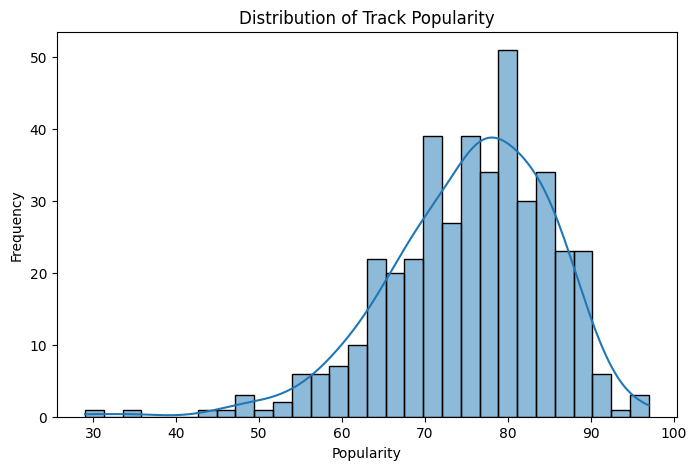

In [13]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
plt.figure(figsize=(8, 5))
sns.histplot(df["Popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


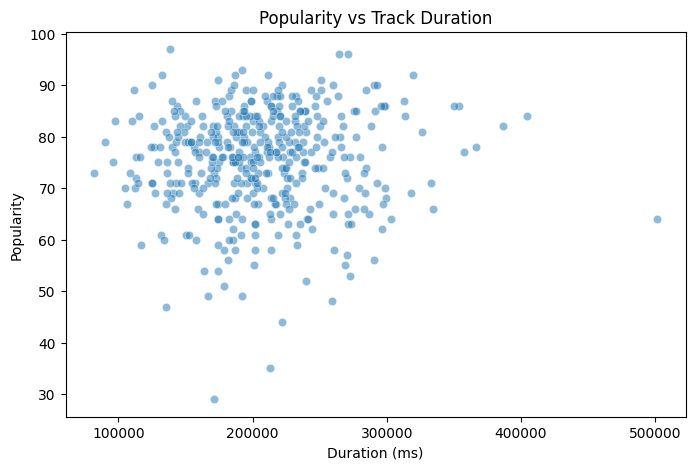

In [14]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], alpha=0.5)
plt.title("Popularity vs Track Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

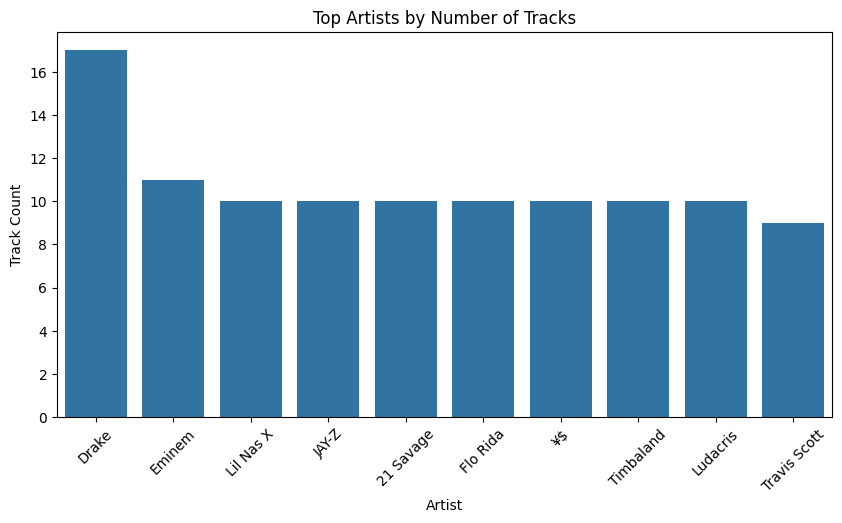

In [15]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a countplot.
plt.figure(figsize=(10, 5))
top_artists = df["Artist"].value_counts().head(10)
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xticks(rotation=45)
plt.title("Top Artists by Number of Tracks")
plt.xlabel("Artist")
plt.ylabel("Track Count")
plt.show()

In [16]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [17]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist.
top_artists_popularity = df.groupby("Artist")["Popularity"].mean().nlargest(5)
print("Top 5 Most Popular Artists (Avg Popularity):")
print(top_artists_popularity)

Top 5 Most Popular Artists (Avg Popularity):
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [18]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
popular_tracks = df.loc[df.groupby("Artist")["Popularity"].idxmax()][["Artist", "Track Name", "Popularity"]]
print("Most Popular Tracks for Each Artist:")
print(popular_tracks)

Most Popular Tracks for Each Artist:
                     Artist  \
369                  *NSYNC   
345                2 Chainz   
70                21 Savage   
391  A Boogie Wit da Hoodie   
437               A$AP Ferg   
..                      ...   
156              Young Nudy   
174              Young Thug   
167            benny blanco   
140                   cassö   
260                      ¥$   

                                            Track Name  Popularity  
369                             Better Place (Reunion)          67  
345                         We Own It (Fast & Furious)          72  
70                                              redrum          96  
391                       Drowning (feat. Kodak Black)          80  
437  Work REMIX (feat. A$AP Rocky, French Montana, ...          69  
..                                                 ...         ...  
156      Peaches & Eggplants (feat. Latto & Sexyy Red)          67  
174         Hot (Remix) [feat. Gunna a

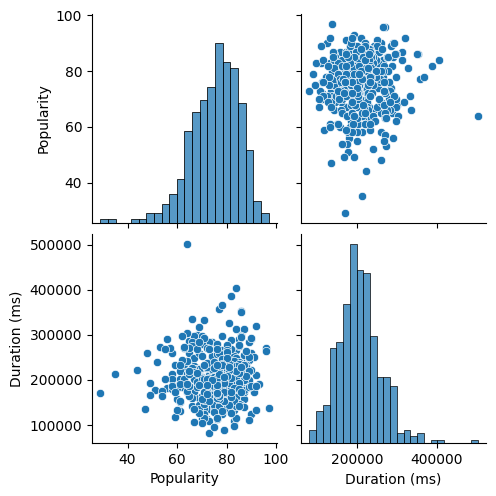

In [19]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
sns.pairplot(df[["Popularity", "Duration (ms)"]])
plt.show()

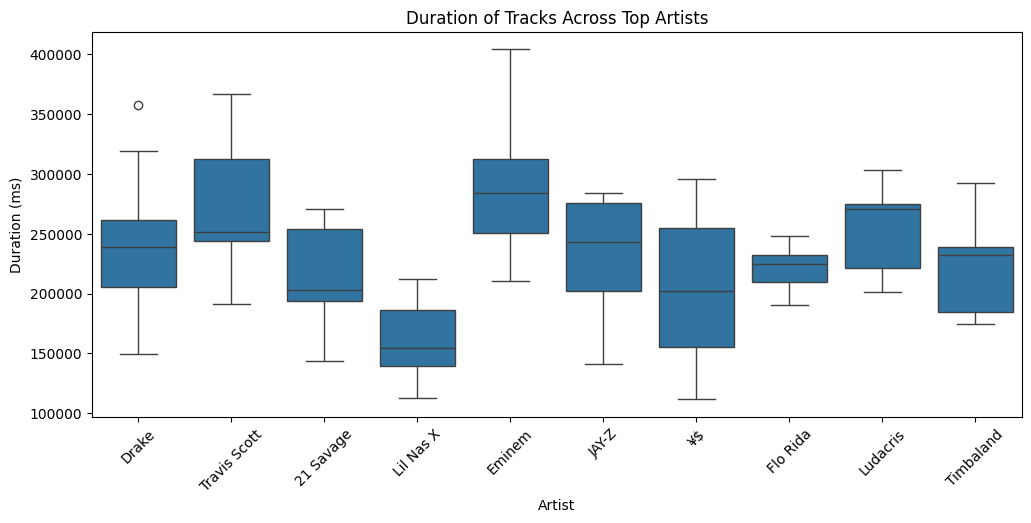

In [20]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
# violin plot.
plt.figure(figsize=(12, 5))
top_artists = df["Artist"].value_counts().index[:10]
sns.boxplot(x=df[df["Artist"].isin(top_artists)]["Artist"], y=df[df["Artist"].isin(top_artists)]["Duration (ms)"])
plt.xticks(rotation=45)
plt.title("Duration of Tracks Across Top Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()


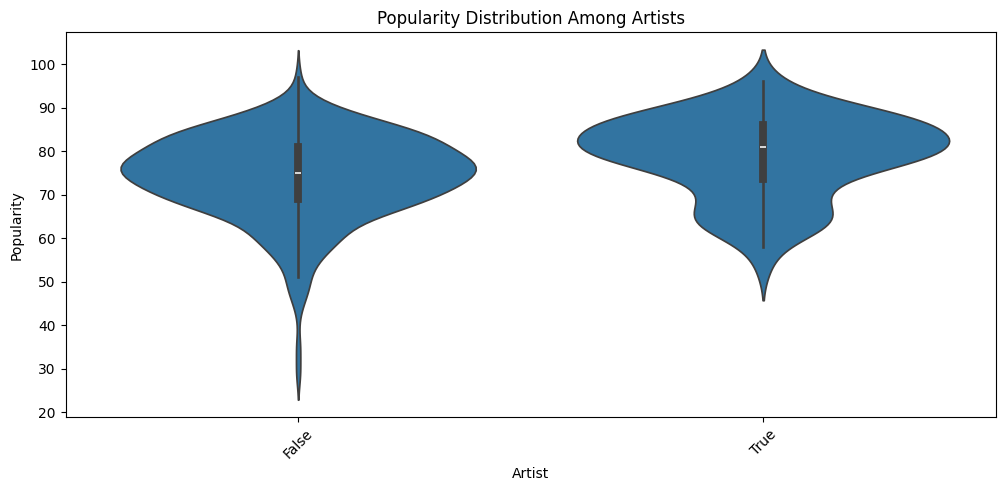

In [21]:
# 10. How does the distribution Of track popularity vary for different artists? Visualize this using a swarm plot or a
# violin plot.
plt.figure(figsize=(12, 5))
sns.violinplot(x=df["Artist"].isin(top_artists), y=df["Popularity"])
plt.xticks(rotation=45)
plt.title("Popularity Distribution Among Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.show()
